In [8]:
import matplotlib.pyplot as plt
from rapidfuzz import fuzz
from rapidfuzz import process

# Example OCR text 
text_extracted = """
evian s/c
grenade white oreo
ftg pineapple
cadbury salted caramel finger
"""

# Food database with expiry dates
food_database = {
    "evian": "2024-12-31",
    "grenade white oreo": "2025-01-15",
    "pineapple": "2025-02-01",
    "pineapple pizza": "2025-02-01",
    "cadbury salted caramel finger": "2025-03-10",
    "cadbury finger": "2025-03-10",
}

lines = [line.strip() for line in text_extracted.splitlines() if line.strip()]

matched_items = []
for line in lines:
    match = process.extractOne(line, food_database.keys(), scorer=fuzz.token_sort_ratio)
    
    if match:
        best_match = match[0] 
        score = match[1] 
        
        if score >= 70:
            expiry_date = food_database[best_match]
            matched_items.append((line, expiry_date, best_match, score))

print("Matched Food Items with Expiry Dates:")
for item_name, expiry_date, matched_item, score in matched_items:
    print(f"Item: {item_name}, Expiry Date: {expiry_date}, Matched Item: {matched_item}, Score: {score}")


Matched Food Items with Expiry Dates:
Item: evian s/c, Expiry Date: 2024-12-31, Matched Item: evian, Score: 71.42857142857143
Item: grenade white oreo, Expiry Date: 2025-01-15, Matched Item: grenade white oreo, Score: 100.0
Item: ftg pineapple, Expiry Date: 2025-02-01, Matched Item: pineapple, Score: 81.81818181818181
Item: cadbury salted caramel finger, Expiry Date: 2025-03-10, Matched Item: cadbury salted caramel finger, Score: 100.0


Results for token_sort_ratio:
Item: evian s/c, Matched Item: evian, Score: 71.42857142857143
Item: grenade white oreo, Matched Item: grenade white oreo, Score: 100.0
Item: ftg pineapple, Matched Item: pineapple, Score: 81.81818181818181
Item: cadbury salted caramel finger, Matched Item: cadbury salted caramel finger, Score: 100.0
Item: apple, Matched Item: apple, Score: 100.0

Results for token_set_ratio:
Item: evian s/c, Matched Item: evian, Score: 100.0
Item: grenade white oreo, Matched Item: grenade white oreo, Score: 100.0
Item: ftg pineapple, Matched Item: pineapple, Score: 100.0
Item: cadbury salted caramel finger, Matched Item: cadbury salted caramel finger, Score: 100.0
Item: apple, Matched Item: apple pie, Score: 100.0

Results for partial_token_sort_ratio:
Item: evian s/c, Matched Item: evian, Score: 100.0
Item: grenade white oreo, Matched Item: grenade white oreo, Score: 100.0
Item: ftg pineapple, Matched Item: pineapple, Score: 100.0
Item: cadbury salted caramel finger, Mat

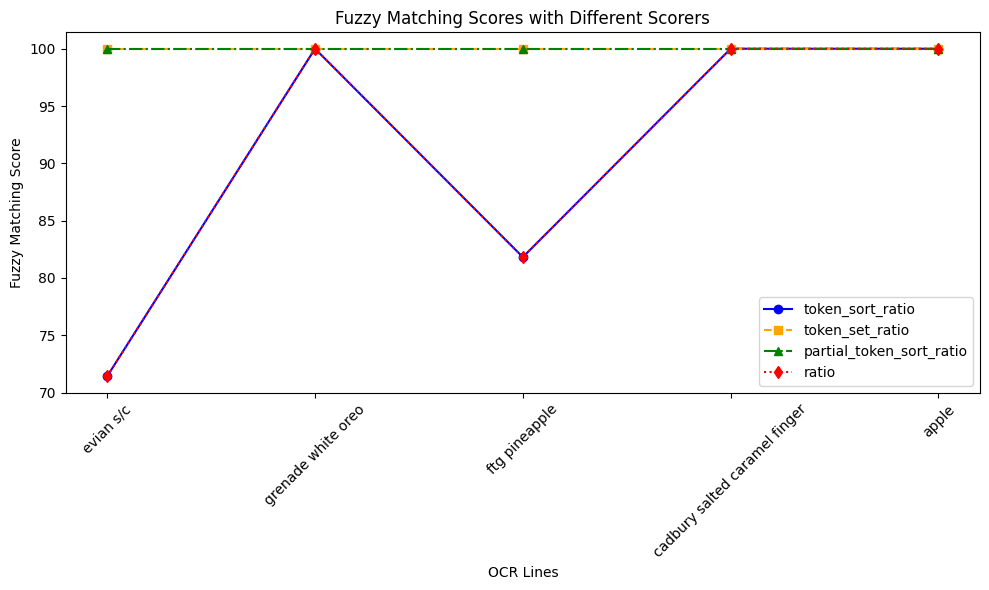

In [6]:

text_extracted = """
evian s/c
grenade white oreo
ftg pineapple
cadbury salted caramel finger
apple
"""

food_database = {
    "evian": "2024-12-31",
    "grenade white oreo": "2025-01-15",
    "pineapple": "2025-02-01",
    "pineapple pizza": "2025-02-01",
    "cadbury salted caramel finger": "2025-03-10",
    "cadbury finger": "2025-03-10",
    "apple pie": "2025-03-10",
    "apple": "2025-03-10",
    "chocolate oreo": "2025-03-10",
}


lines = [line.strip() for line in text_extracted.splitlines() if line.strip()]

# Initializing lists to store results for all the scorers
scores_token_sort_ratio = []
scores_token_set_ratio = []
scores_partial_token_sort_ratio = []
scores_ratio = []

# Storing the matched items for comparison
matched_items_sort = []
matched_items_set = []
matched_items_partial = []
matched_items_ratio = []

#  calculating fuzzy matching scores for each scorer
for line in lines:
    # Token Sort Ratio
    match_sort = process.extractOne(line, food_database.keys(), scorer=fuzz.token_sort_ratio)
    if match_sort:
        matched_item_sort = match_sort[0]
        score_sort = match_sort[1]
        scores_token_sort_ratio.append(score_sort)
        matched_items_sort.append(matched_item_sort)
    
    # Token Set Ratio
    match_set = process.extractOne(line, food_database.keys(), scorer=fuzz.token_set_ratio)
    if match_set:
        matched_item_set = match_set[0]
        score_set = match_set[1]
        scores_token_set_ratio.append(score_set)
        matched_items_set.append(matched_item_set)
    
    # Partial Token Sort Ratio
    match_partial = process.extractOne(line, food_database.keys(), scorer=fuzz.partial_token_sort_ratio)
    if match_partial:
        matched_item_partial = match_partial[0]
        score_partial = match_partial[1]
        scores_partial_token_sort_ratio.append(score_partial)
        matched_items_partial.append(matched_item_partial)
    
    # Ratio
    match_ratio = process.extractOne(line, food_database.keys(), scorer=fuzz.ratio)
    if match_ratio:
        matched_item_ratio = match_ratio[0]
        score_ratio = match_ratio[1]
        scores_ratio.append(score_ratio)
        matched_items_ratio.append(matched_item_ratio)


print("Results for token_sort_ratio:")
for item, matched_item, score in zip(lines, matched_items_sort, scores_token_sort_ratio):
    print(f"Item: {item}, Matched Item: {matched_item}, Score: {score}")

print("\nResults for token_set_ratio:")
for item, matched_item, score in zip(lines, matched_items_set, scores_token_set_ratio):
    print(f"Item: {item}, Matched Item: {matched_item}, Score: {score}")

print("\nResults for partial_token_sort_ratio:")
for item, matched_item, score in zip(lines, matched_items_partial, scores_partial_token_sort_ratio):
    print(f"Item: {item}, Matched Item: {matched_item}, Score: {score}")

print("\nResults for ratio:")
for item, matched_item, score in zip(lines, matched_items_ratio, scores_ratio):
    print(f"Item: {item}, Matched Item: {matched_item}, Score: {score}")


plt.figure(figsize=(10, 6))


plt.plot(lines, scores_token_sort_ratio, label="token_sort_ratio", marker='o', linestyle='-', color='b')
plt.plot(lines, scores_token_set_ratio, label="token_set_ratio", marker='s', linestyle='--', color='orange')
plt.plot(lines, scores_partial_token_sort_ratio, label="partial_token_sort_ratio", marker='^', linestyle='-.', color='g')
plt.plot(lines, scores_ratio, label="ratio", marker='d', linestyle=':', color='r')


plt.title("Fuzzy Matching Scores with Different Scorers")
plt.xlabel("OCR Lines")
plt.ylabel("Fuzzy Matching Score")


plt.xticks(rotation=45)

plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
